<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/kalman-filters/rlabbe/rlabbe_07_math_scraps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install filterpy

In [2]:
import numpy as np

from matplotlib.pyplot import plot
from matplotlib import pyplot as plt

from scipy.linalg import expm

In [13]:
dt = 0.1
A = np.array([[0,1], [0.05, -0.5]])
F = expm(A*dt)
print('A\n', A)
print('F\n', F)

A
 [[ 0.    1.  ]
 [ 0.05 -0.5 ]]
F
 [[1.0002459  0.09754928]
 [0.00487746 0.95147126]]


In [26]:
xs = []


start_points = [(0, 1.5), (0,0.6), (0,0.4), (0, 0.2), (1.5, 0.01), (3,0.01), (6,0.01), (6, 0.8)]
initials = [np.array([[p, v]]).T for p,v in start_points]

for x in initials:
  xs.append(x)
  for step in range(100):
    x = F.dot(x)
    xs.append(x)

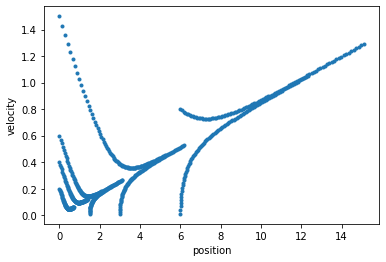

In [27]:
states = np.array(xs)

plot(states[:,0], states[:,1], '.')
plt.xlabel('position')
plt.ylabel('velocity')
plt.show()
